In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [2]:
KEGG_df = pd.read_parquet("../data/interim/enzymemap_Kegg_JN_mapped.parquet")
KEGG_df['top_mapped_operator'] = KEGG_df['top_mapped_operator'].fillna("None")

MetaCyc_df = pd.read_parquet("../data/interim/enzymemap_MetaCyc_JN_mapped.parquet")
MetaCyc_df['top_mapped_operator'] = MetaCyc_df['top_mapped_operator'].fillna("None")

In [3]:
def extract_rule_num(x):
    if x == "None":
        return np.inf   # sort None last
    m = re.search(r'rule(\d+)', x)
    return int(m.group(1)) if m else np.inf

#### Visualizing the count distribution of KEGG reactions mapped to first 50 reaction rules

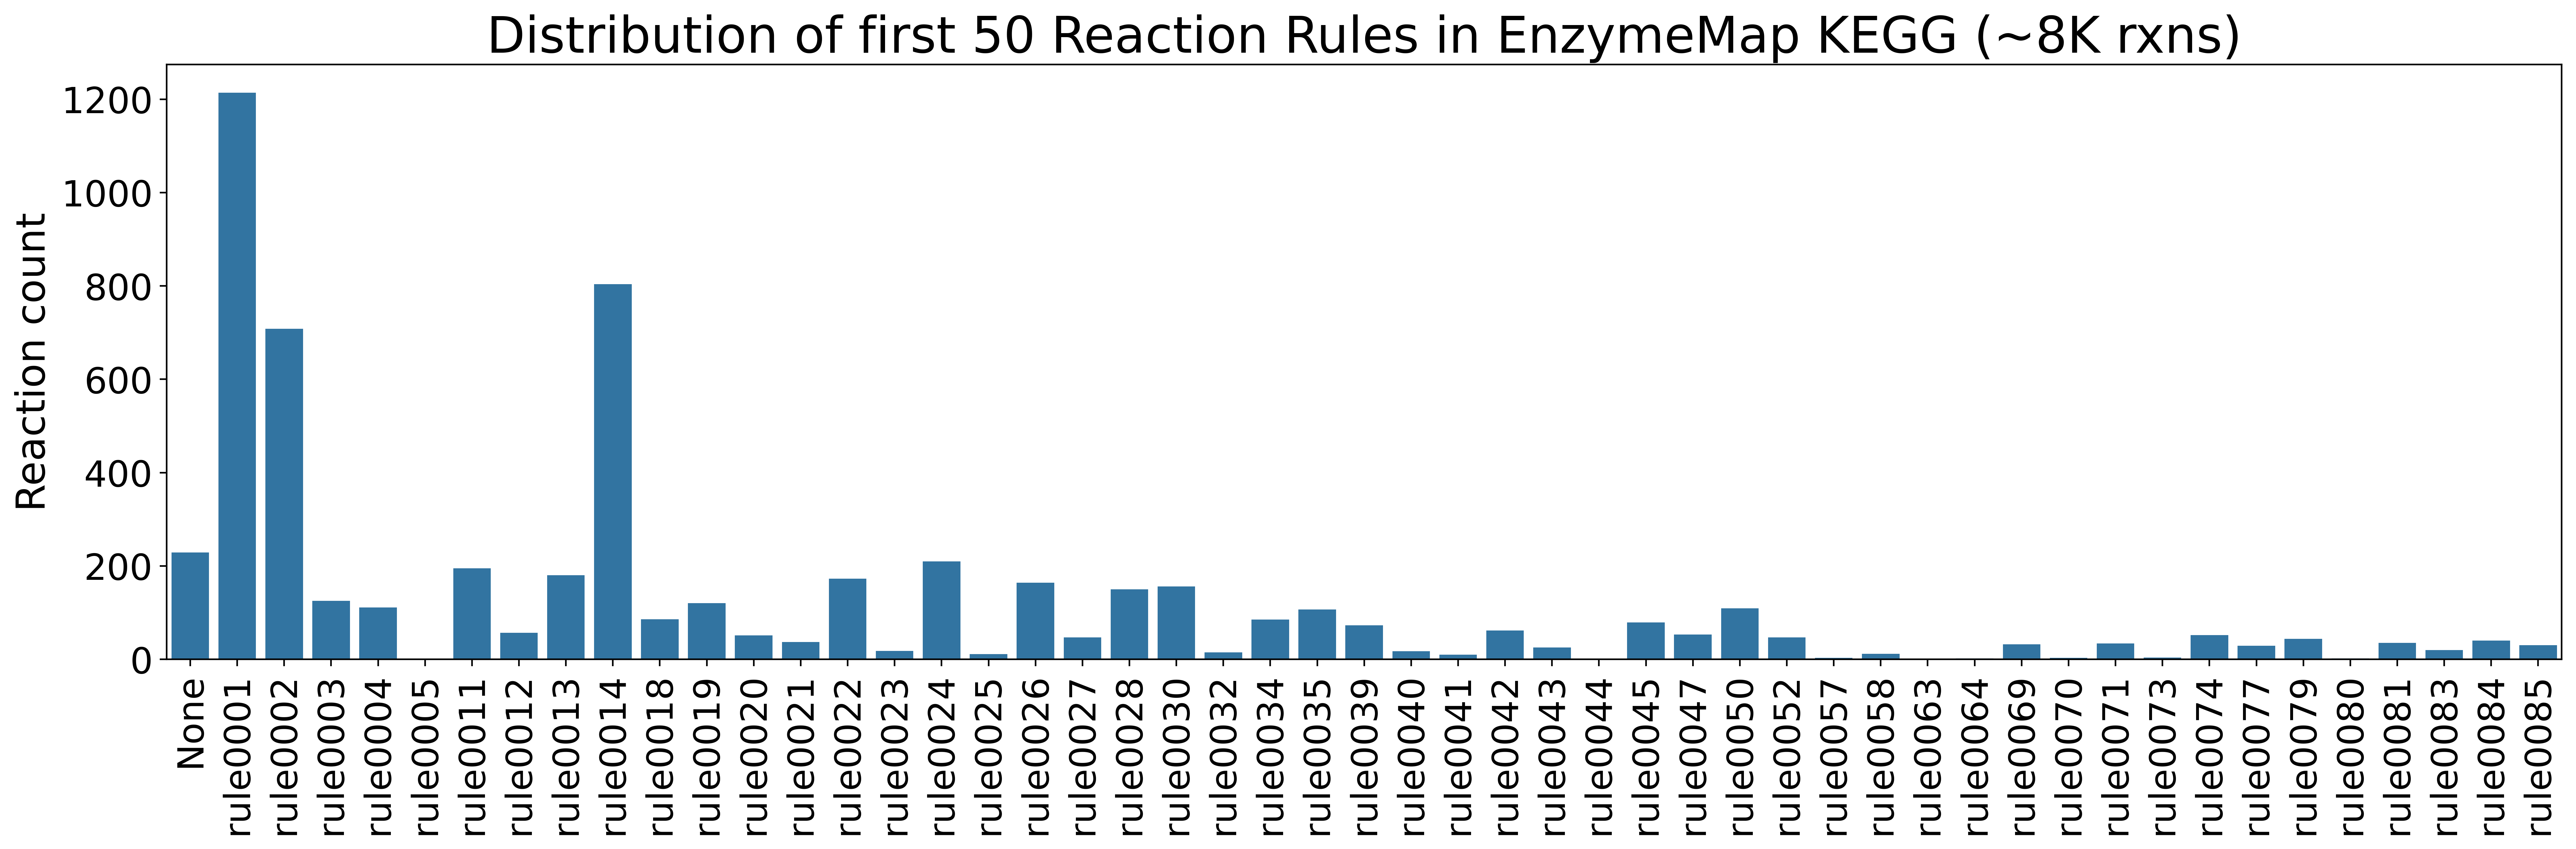

In [4]:
unique_rules = sorted(
    KEGG_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

plt.figure(figsize=(18,6))
sns.countplot(
    data=KEGG_df[KEGG_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title("Distribution of first 50 Reaction Rules in EnzymeMap KEGG (~8K rxns)", size = 25)
plt.tight_layout()
plt.savefig("../plots/EnzymeMap_KEGG_JN_mapped_top50_distribution.png")
plt.show()

#### Visualizing the count distribution of MetaCyc reactions mapped to first 50 reaction rules

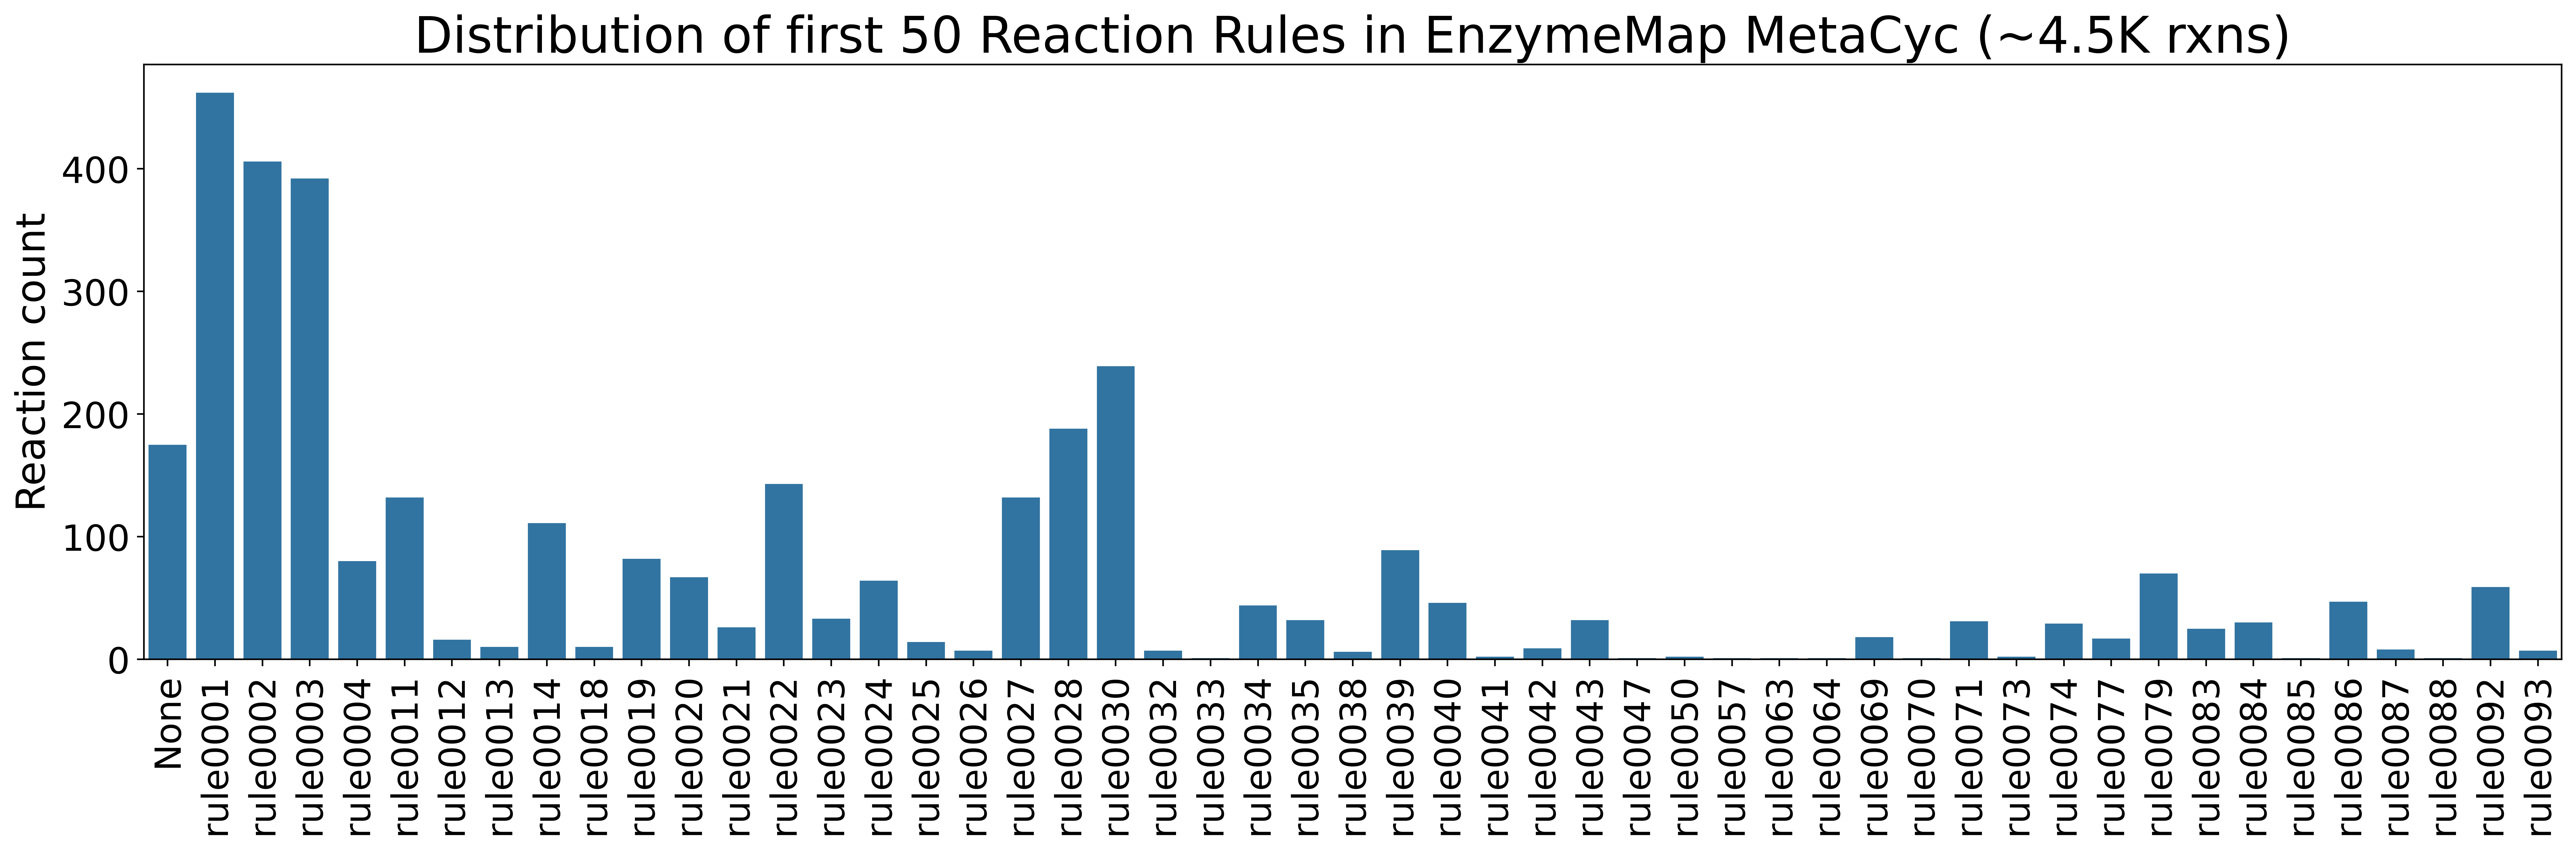

In [5]:
unique_rules = sorted(
    MetaCyc_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

plt.figure(figsize=(18,6))
sns.countplot(
    data=MetaCyc_df[MetaCyc_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title("Distribution of first 50 Reaction Rules in EnzymeMap MetaCyc (~4.5K rxns)", size = 25)
plt.tight_layout()
plt.savefig("../plots/EnzymeMap_MetaCyc_JN_mapped_top50_distribution.png")
plt.show()

In [6]:
KEGG_df

,rxn_idx,mapped,unmapped,orig_rxn_text,rule,rule_id,source,steps,quality,natural,organism,protein_refs,protein_db,ec_num,all_mapped_operators,top_mapped_operator
0,2,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,Ethanol + NAD+ = Acetaldehyde + NADH + H+,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,1,direct,single,0.9375,NaN,NaN,[],NaN,1.1.1.1,"[rule0002, rule0754]",rule0002
1,2,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,Ethanol + NAD+ = Acetaldehyde + NADH + H+,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,1,direct reversed_suggested,single,0.9375,NaN,NaN,[],NaN,1.1.1.1,"[rule0003, rule0753]",rule0003
2,3,[CH3:1][C:2]1=[C:3](/[CH:4]=[CH:5]/[C:6]([CH3:...,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/CO)C(C)(C)CCC1.NC...,Retinol + NAD+ = Retinal + NADH + H+,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,1,direct,single,0.9375,NaN,NaN,[],NaN,1.1.1.1,[rule0002],rule0002
3,3,[CH3:1][C:2]1=[C:3](/[CH:4]=[CH:5]/[C:6]([CH3:...,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=O)C(C)(C)CCC1.N...,Retinol + NAD+ = Retinal + NADH + H+,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,1,direct reversed_suggested,single,0.9375,NaN,NaN,[],NaN,1.1.1.1,[rule0003],rule0003
4,4,[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2...,CCCCCCCCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O...,1-Octanol + NAD+ = Octanal + NADH + H+,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,1,direct,single,0.9375,NaN,NaN,[],NaN,1.1.1.1,"[rule0002, rule0754]",rule0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7961,10282,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,ATP + Propanoyl-CoA + HCO3- = ADP + Orthophosp...,[#6:1].[#6:2]-[#8:3].[#8:4]-[#15:5]>>[#6:1]-[#...,831,direct,single,1.0000,NaN,NaN,[],NaN,6.4.1.3,[rule0356],rule0356
7962,10283,[CH3:1][CH2:2][CH2:3][C:4](=[O:5])[S:6][CH2:7]...,CCCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O...,ATP + HCO3- + Butanoyl-CoA + H+ = ADP + Orthop...,[#6:1].[#6:2]-[#8:3].[#8:4]-[#15:5]>>[#6:1]-[#...,831,direct,single,1.0000,NaN,NaN,[],NaN,6.4.1.3,[rule0356],rule0356
7963,10284,[CH3:1][C:2]([CH3:3])=[CH:4][C:5](=[O:6])[S:7]...,CC(C)=CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)CO...,ATP + 3-Methylcrotonyl-CoA + HCO3- = ADP + Ort...,[#6:1].[#6:2]-[#8:3].[#8:4]-[#15:5]>>[#6:1]-[#...,831,direct,single,1.0000,NaN,NaN,[],NaN,6.4.1.4,[rule0356],rule0356
7964,10285,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,CC(C)=CCC/C(C)=C/C(=O)SCCNC(=O)CCNC(=O)[C@H](O...,ATP + Geranoyl-CoA + HCO3- = ADP + Orthophosph...,[#6:1].[#6:2]-[#8:3].[#8:4]-[#15:5]>>[#6:1]-[#...,831,direct,single,1.0000,NaN,NaN,[],NaN,6.4.1.5,[rule0356],rule0356


In [7]:
import pandas as pd
from ipywidgets import interact, Dropdown, VBox, Output
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, rdChemReactions
from IPython.display import display, HTML

# --- SETTINGS ---
df = KEGG_df  # <-- your dataframe
rule_column = "top_mapped_operator"
mapped_column = "unmapped"  # RDKit SMARTS after mapping
text_column = "orig_rxn_text"  # <-- added column
reaction_size = (400, 200)


# --- UTIL FUNCTION ---
def draw_reaction_from_smarts(rxn_smarts: str):
    """Convert SMARTS → RDKit Reaction → PIL Image."""
    try:
        rxn = rdChemReactions.ReactionFromSmarts(rxn_smarts)
        if rxn is None:
            return None
        return Draw.ReactionToImage(rxn, subImgSize=reaction_size)
    except Exception:
        return None


# --- CALLBACK ---
def show_reactions_for_rule(selected_rule):
    out.clear_output()

    with out:
        subset = df[df[rule_column] == selected_rule]

        if subset.empty:
            print(f"No reactions found for {selected_rule}.")
            return

        print(f"{len(subset)} reactions mapped to {selected_rule}:\n")

        for _, row in subset.iterrows():
            rxn_smarts = row[mapped_column]
            rxn_text   = row[text_column]

            img = draw_reaction_from_smarts(rxn_smarts)

            if img:
                display(img)
            else:
                print(f"[Could not render reaction SMARTS]: {rxn_smarts}")

            # Print reaction text nicely under each image
            display(HTML(f"<div style='margin-bottom:20px; font-family:monospace; color:#444;'>{rxn_text}</div>"))

            # Divider for readability
            display(HTML("<hr style='border:0; border-top:1px solid #ccc;'>"))


# --- WIDGET SETUP ---
all_rules = sorted(df[rule_column].dropna().unique())

dropdown = Dropdown(
    options=all_rules,
    value=all_rules[0],
    description="Rule:",
    layout={"width": "300px"}
)

out = Output()
ui = VBox([dropdown, out])

def _update(change):
    show_reactions_for_rule(change["new"])

dropdown.observe(_update, names="value")

# initial call
show_reactions_for_rule(dropdown.value)
ui
